# $\textbf{Parcial 1, Métodos Computacionales}$
## $\textbf{Gabriel Cataño Sánchez}$
### $\textbf{CC: 1039474879}$

# $\textbf{Enunciado}$

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre las soluciones a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

# $\textbf{Solución}$

In [41]:
#Librerías

import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import sympy as sy
from scipy import optimize

## $\textbf{Primera Parte} $

In [2]:
#Leer el archivo JSON y ponerlo en un Dataframe

link = 'https://github.com/restrepo/anomaly/raw/main/solutions.json.gz'
d1 = pd.read_json(link)
d1.head()

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11


In [3]:
# Halla el máximo de cada lista en la columna solutions del Dataframe

s = d1['solution']
sm = [l for l in s[:]]
smax = []
for i in range(0,len(sm)):
  smi = sm[i] 
  ab = [abs(x) for x in smi]
  sma = max(ab)
  smax = smax + [sma]

In [39]:
# Suma de los elementos de cada lista en la columna 'solution' del Dataframe

suma = s.apply(sum)
d = pd.DataFrame(suma)
d

,solution
0,0
1,0
2,0
3,0
4,0
...,...
390069,0
390070,0
390071,0
390072,0


In [26]:
# Se crea el Dataframe con las columnas nuevas de los datos obtenidos 

dicc = {'smax': smax}
d2 = pd.DataFrame(dicc)
d3 = pd.DataFrame()
d3['l'] = d1['l']
d3['k'] = d1['k']
d3['slution'] = d1['solution']
d3['smax'] = d2
d3['sum_s'] = d['solution']
d3['gcd'] = d1['gcd']
d3['n'] = d1['n']
d3

,l,k,slution,smax,sum_s,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",6,0,1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",4,0,1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",6,0,2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",7,0,1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",8,0,1,11
...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",32,0,36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",28,0,100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",32,0,1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",31,0,18,8


In [5]:
# Obtenemos la fila con la smilla para los coeficientes del polinomio

np.random.seed(1039474879)
n = np.random.randint(0,390074)
print('Fila para sacar el los coeficientes: ',n)

Fila para sacar el los coeficientes:  323626


In [6]:
# Lista de los coeficientes que tendrá el polinomio

d3.iloc[n,2]

[1, -9, -11, -12, 17, 18, 20, -23, 30, -31]

In [7]:
# Polinomio de grado 9 con los coeficientes obtenidos

coef = d3.iloc[n,2]
coef = np.array(coef)
poly = np.poly1d(coef)
print(np.poly1d(poly))

   9     8      7      6      5      4      3      2
1 x - 9 x - 11 x - 12 x + 17 x + 18 x + 20 x - 23 x + 30 x - 31


In [12]:
# Raíces del polinomio con el método de Newton

root1 = optimize.newton(poly,-18)
root2 = optimize.newton(poly,-10)
root3 = optimize.newton(poly,0)
root4 = optimize.newton(poly,10)
root5 = optimize.newton(poly,18)

print('raíz 1: ' ,root1)
print('raíz 2: ' ,root2)
print('raíz 3: ' ,root3)
print('raíz 4: ' ,root4)
print('raíz 5: ' ,root5)

raíz 1:  1.0000000000000544
raíz 2:  0.9999999999999996
raíz 3:  1.0000000000000155
raíz 4:  10.17856620905625
raíz 5:  10.17856620905625


In [9]:
# Derivda  del polinomio

x = sy.var('x')
dp = sy.diff(poly(x))
dp

x*(x*(x*(x*(x*(x*(x*(x - 9) - 11) - 12) + 17) + 18) + 20) - 23) + x*(x*(x*(x*(x*(x*(x*(x - 9) - 11) - 12) + 17) + 18) + 20) + x*(x*(x*(x*(x*(x*(x - 9) - 11) - 12) + 17) + 18) + x*(x*(x*(x*(x*(x - 9) - 11) - 12) + 17) + x*(x*(x*(x*(x - 9) - 11) - 12) + x*(x*(x*(x - 9) - 11) + x*(x*(x - 9) + x*(2*x - 9) - 11) - 12) + 17) + 18) + 20) - 23) + 30

(-35.0, 35.0)

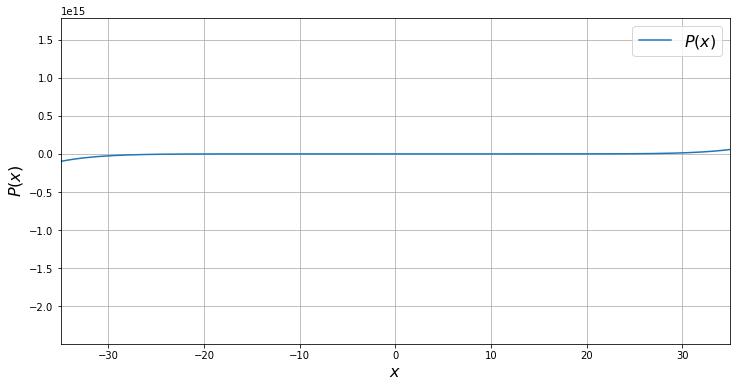

In [10]:
# Gráfico del polinomio
x = np.linspace(-50,50,10000)

plt.figure(figsize=(12,6))
plt.plot(x,poly(x), label = '$P(x)$')
plt.grid()
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$P(x)$', fontsize = 16)
plt.legend(fontsize = 16)

# Límite en el eje x
plt.xlim(-35,35)

## $\textbf{Segunda Parte}$

In [13]:
# Fijar semilla y sacar número aleatorio

np.random.seed(1039474879)
n = print('Número: ', np.random.randint(1,6))

Número:  3


Función: 
\begin{equation}
 \frac{\sin x}{x}=-p\,
\end{equation}

In [14]:
#Hallar valor alatorio para p con semilla
np.random.seed(1039474)
p = np.random.rand()
print('Valor aleatorio entre 0 y 1 para p: %.3f ' %p)

Valor aleatorio entre 0 y 1 para p: 0.153 


Luego la función queda: 
\begin{equation}
g(x) = \frac{\sin x}{x} + 0.153\,
\end{equation}

In [17]:
# Hallar las soluciones a la ecuación anerior

g = lambda x : np.sin(x)/x + p


#Calculo de las raíces con el método "bisect".
r1 = optimize.bisect(g, -10, -4)
print('r1: ',r1)

r2 = optimize.bisect(g, -1, 5)
print('r2: ',r2)

r3 = optimize.bisect(g, 5, 10)
print('r3: ',r3)

r1:  -5.32832749756426
r2:  3.754339552530382
r3:  5.328327497564942


In [18]:
#Calculo de las raíces con el método "Newton Rapshod".
r4 = optimize.newton(g,-4)
print('r4: ',r4)

r5 = optimize.newton(g,-6)
print('r5: ',r5)

r4:  -3.754339552531586
r5:  -5.328327497564297


Vemos que utilizando dos métodos para hallar raíces, tenemos 4 raíces, en: -5.33, -3.75, 3.75 y 5.33, allí la función se hace cero.\
\
 A continuación se graficará la función con valores de $x$ $\epsilon$ $[-10,10]$.

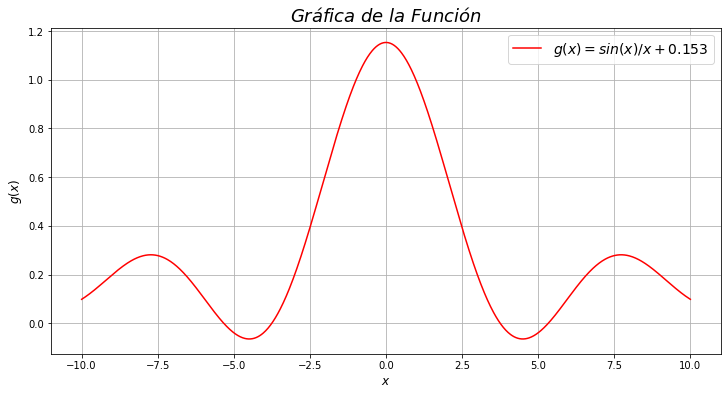

In [19]:
# Valores de x, entre -10 y 10, 1000 puntos
x = np.linspace(-10,10,1000)

# Gráfica de la función
plt.figure(figsize=(12,6))
plt.plot(x, g(x), 'r', label = '$g(x) = sin(x)/x + 0.153$')
plt.title('$Gráfica$ $de$ $la$ $Función$', fontsize= 18)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$g(x)$', fontsize=12)
plt.legend(fontsize = 14)
plt.grid()

Observamos entonces que efectivamente como la función se hace cero en los valores encontrados anteriormente